## <span style="color:#a4d4a3">**Kalman Filter**</span>

The Kalman Filter is a <span style="color:#ffa500">**Bayes filter**</span> specifically designed for <span style="color:#ffa500">**linear Gaussian**</span> estimation problems. Under these assumptions, the Kalman Filter provides an <span style="color:#ffa500">**optimal solution**</span>:

- <span style="color:#00703c">**Linear motion and observation models**</span>.
- <span style="color:#00703c">**Zero-mean Gaussian noise**</span> in both the motion and sensor measurements.

Everything involved in the Kalman Filter <span style="color:#ffa500">**remains Gaussian**</span>, which is essential for its mathematical formulation.

---



### 🔔 <span style="color:#a4d4a3">**Gaussian Distributions**</span>

A Gaussian (normal) distribution is defined by:

$$
p(x) = \det(2\pi\Sigma)^{-\frac{1}{2}}\exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)
$$

Two crucial properties of Gaussian distributions are <span style="color:#ffa500">**marginalization**</span> and <span style="color:#ffa500">**conditioning**</span>:

<span style="color:#a4d4a3">**Marginalization:**</span>

Given the joint Gaussian distribution:

$$
p(x) = p\left(
\begin{bmatrix}
x_a \\[6pt]
x_b
\end{bmatrix}\right) = \mathcal{N}\left(
\begin{bmatrix}
\mu_a \\[6pt]
\mu_b
\end{bmatrix},
\begin{bmatrix}
\Sigma_{aa} & \Sigma_{ab} \\[6pt]
\Sigma_{ba} & \Sigma_{bb}
\end{bmatrix}\right)
$$

The marginal distribution of $ x_a $ is:

$$
p(x_a) = \int p(x_a, x_b)\,dx_b = \mathcal{N}(\mu_a, \Sigma_{aa})
$$

<span style="color:#a4d4a3">**Conditioning:**</span>

The conditional distribution of $ x_a $ given $ x_b $ is Gaussian:

$$
p(x_a|x_b) = \frac{p(x_a, x_b)}{p(x_b)} = \mathcal{N}(\mu, \Sigma)
$$

with:

$$
\mu = \mu_a + \Sigma_{ab}\Sigma_{bb}^{-1}(x_b - \mu_b)
$$

$$
\Sigma = \Sigma_{aa} - \Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ba}
$$

> 📝 <span style="color:#0098ff">**Note:**</span> <em>Computing the inverse of $ \Sigma_{bb} $ can be computationally expensive. Additionally, if little is known about $ x_b $, the second term tends toward zero.</em>

---



### 📏 <span style="color:#a4d4a3">**Linear Models**</span>

The Kalman Filter <span style="color:#ffa500">**assumes linear models**</span> of the form:

<span style="color:#a4d4a3">**Linear Motion Model:**

$$
x_t = A_t x_{t-1} + B_t u_t + \epsilon_t
$$

<span style="color:#a4d4a3">**Linear Observation Model:**

$$
z_t = C_t x_t + \delta_t
$$

These represent the <span style="color:#ffa500">**mean models**</span> where the uncertainty is explicitly included through noise terms $ \epsilon_t, \delta_t $, both Gaussian distributed with covariance matrices $ R_t $ and $ Q_t $.

<span style="color:#a4d4a3">**Components of the Kalman Filter:**</span>

- $ A_t $: State transition matrix (n×n) describing state evolution without controls or noise.
- $ B_t $: Control input matrix (n×l) describing how controls influence the state.
- $ C_t $: Observation matrix (k×n) mapping the state space to observations.
- $ \epsilon_t, \delta_t $: Gaussian noise terms for process and measurement uncertainties, respectively.


Thus, the probability distributions for the motion and observation models are:

<span style="color:#a4d4a3">**Motion under Gaussian noise:**</span>

$$
p(x_t|u_t,x_{t-1}) = det(2 \pi R_t )^{-\frac{1}{2}} \cdot \exp\left(-\frac{1}{2}(x_t - A_t x_{t-1} - B_t u_t)^T R_t^{-1}(x_t - A_t x_{t-1} - B_t u_t)\right)
$$

where $ R_t $ describes the noise of the motion.

<span style="color:#a4d4a3">**Measurement under Gaussian noise:**</span>

$$
p(z_t|x_t) = det(2 \pi Q_t )^{-\frac{1}{2}} \exp\left(-\frac{1}{2}(z_t - C_t x_t)^T Q_t^{-1}(z_t - C_t x_t)\right)
$$

where $ Q_t $ describes the noise of the measurement.


### 🧮 <span style="color:#a4d4a3">**Kalman Filter Algorithm**</span>

The Kalman Filter recursively computes the belief distribution in two main steps: a <span style="color:#ffa500">**prediction step**</span> and a <span style="color:#ffa500">**correction step**</span>.


> <tt> <span style="color:#FF2DD1">1.</span> <span style="color:#4D96FF">def</span> **<span style="color:#6BCB77">Kalman_Filter</span>($\color{#ffa500}\mu_{t-1}, \color{#ffa500}\Sigma_{t-1}, \color{#ffa500}u_t, \color{#ffa500}z_t$):**
>> <span style="color:#948979"># Prediction step</span>   
>><span style="color:#FF2DD1">2.</span> $ \bar{\mu}_t = A_t \mu_{t-1} + B_t u_t $  
>><span style="color:#FF2DD1">3.</span> $ \bar{\Sigma}_t = A_t \Sigma_{t-1} A_t^T + R_t $ 
>>
>><span style="color:#948979"># Correction step</span>    
>><span style="color:#FF2DD1">3.</span> $K_t = \bar{\Sigma}_t C_t^T (C_t \bar{\Sigma}_t C_t^T + Q_t)^{-1} \quad$ 
>><span style="color:#948979"> # Compute Kalman Gain </span>     
>> <span style="color:#FF2DD1">4.</span> $\mu_t = \bar{\mu}_t + K_t (z_t - C_t \bar{\mu}_t)\quad\quad$ 
>><span style="color:#948979"> # Update mean </span>     
>><span style="color:#FF2DD1">5.</span> $\Sigma_t = (I - K_t C_t)\bar{\Sigma}_t \quad\quad\quad$ 
>><span style="color:#948979"> # Update covariance </span>    
>>
>> <span style="color:#948979"># Updated belief</span>    
>><span style="color:#FF2DD1">6.</span> return $ \mu_t, \Sigma_t $      


#### <span style="color:#a4d4a3">Interpretation of the Kalman Gain</span> ($K_t$)

The Kalman gain trades off how certain we are about the observations compared to the motion prediction:

- <span style="color:#ffa500">**No measurement uncertainty**</span> ($Q_t = 0$): $\quad K_t = C_t^{-1}$

The update directly maps observations into state space.

- <span style="color:#ffa500">**Infinite measurement uncertainty**</span> ($Q_t = \infty$): $\quad K_t = 0$

No correction step is performed.

> 📖 <span style="color:#0098ff">**Further Reading:**</span> <em>Mathematical proofs and detailed derivations of the Kalman Filter can be found in *Probabilistic Robotics*, Section 3.2.4.</em>

---

##### 📈 `Python Example #1: 1D Kalman Filter`

In this section we walk through a simple 1-dimensional Kalman Filter example: <span style="color:#ffa500">**Prediction**</span>, <span style="color:#ffa500">**Measurement**</span>, and <span style="color:#ffa500">**Correction**</span>.

1. We use the motion model  
$$
x_t = A\,x_{t-1} + B\,u + \epsilon,\quad \epsilon\sim\mathcal{N}(0,R)
$$  

to compute the <span style="color:#ffa500">**predicted**</span> mean and variance:

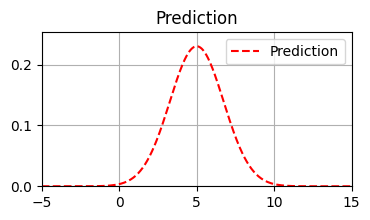

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Prior belief
mu_0, sigma_0 = 0.0, 1.0

# Motion model parameters
A, B = 1.0, 1.0
u = 5.0
R = 2.0

# Prediction
mu_pred    = A * mu_0 + B * u
sigma_pred = A**2 * sigma_0 + R

# Plot Prediction
x = np.linspace(-5, 15, 400)
pred_pdf = (1/np.sqrt(2*np.pi*sigma_pred)) \
           * np.exp(-0.5*(x-mu_pred)**2/sigma_pred)

plt.figure(figsize=(4, 2))  # Adjust figure size
plt.plot(x, pred_pdf, 'r--', label='Prediction')
plt.title('Prediction')
plt.xlim(x.min(), x.max())
plt.ylim(0, pred_pdf.max()*1.1)
plt.legend()
plt.grid(True)
plt.show()


2. Then, we simulate a noisy measurement

$$

z = C_t x_t + \delta, \quad \delta \sim \mathcal{N}(0, Q)

$$

and plot it against our prior prediction:

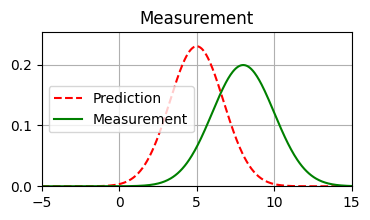

In [11]:
# Measurement model parameters
C = 1.0
Q = 4.0
z = 8.0

# Measurement distribution
meas_pdf = (1/np.sqrt(2*np.pi*Q)) \
           * np.exp(-0.5*(x-z)**2/Q)

# Plot Measurement + Prediction
plt.figure(figsize=(4, 2))
plt.plot(x, pred_pdf, 'r--', label='Prediction')
plt.plot(x, meas_pdf, 'g-',  label='Measurement')
plt.title('Measurement')
plt.xlim(x.min(), x.max())
plt.ylim(0, max(pred_pdf.max(), meas_pdf.max())*1.1)
plt.legend()
plt.grid(True)
plt.show()

3. Finally, we update our belief with the Kalman gain

$$
K = \frac{\sigma_{pred} C}{C^2 \sigma_{pred} + Q}
$$

to get the <span style="color:#ffa500">**corrected**</span> mean and variance:

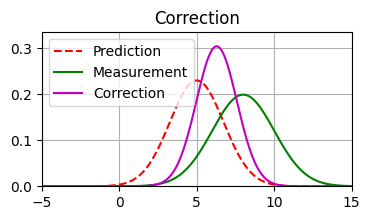

In [12]:
# Correction step
K        = sigma_pred * C / (C**2 * sigma_pred + Q)
mu_corr  = mu_pred + K * (z - C * mu_pred)
sigma_corr = (1 - K * C) * sigma_pred

# Correction distribution
corr_pdf = (1/np.sqrt(2*np.pi*sigma_corr)) \
           * np.exp(-0.5*(x-mu_corr)**2/sigma_corr)

# Plot Correction + Prediction + Measurement
plt.figure(figsize=(4, 2))  # Adjusted figure size
plt.plot(x, pred_pdf, 'r--', label='Prediction')
plt.plot(x, meas_pdf, 'g-',  label='Measurement')
plt.plot(x, corr_pdf, 'm-',  label='Correction')
plt.title('Correction')
plt.xlim(x.min(), x.max())
plt.ylim(0, max(pred_pdf.max(), meas_pdf.max(), corr_pdf.max())*1.1)
plt.legend()
plt.grid(True)
plt.show()



This illustrates the core idea of Kalman filtering: <span style="color:#ffa500">**recursive fusion**</span> of prediction and observation under <span style="color:#ffa500">**Gaussian assumptions**</span>. In higher-dimensional SLAM problems, the same principles apply, only the matrices grow, but the filter remains an <span style="color:#ffa500">**optimal, efficient estimator**</span> for <span style="color:#ffa500">**linear Gaussian systems**</span>. 

> 🧐 <span style="color:#0098ff">***But how often do we see linear systems in the real-world and especially in robotic systems where rotations and angles are involved?***</span>
---

## <span style="color:#a4d4a3">**Extended Kalman Filter (EKF)**</span>

While the Kalman Filter is optimal and efficient for linear Gaussian systems, most realistic robotics problems involve <span style="color:#ffa500">**non-linear dynamic systems**</span>. 

For example, consider a robot performing **rotations** in a 2D plane. The rotation dynamics are inherently non-linear due to trigonometric functions that govern the orientation of the robot. The previously linear state-space equations:

$$
x_t = A_t x_{t-1} + B_t u_t + \epsilon_t
$$

$$
z_t = C_t x_t + \delta_t
$$

no longer adequately describe such systems. Instead, we use more general non-linear functions:

$$
x_t = g(u_t, x_{t-1}) + \epsilon_t
$$

$$
z_t = h(x_t) + \delta_t
$$

where $g$ might represent the robot's motion model involving angles and rotations, and $h$ could represent sensor measurements (e.g., range and bearing sensors).

These non-linear functions break the Gaussian assumptions of the standard Kalman filter. Therefore, the filter is no longer directly applicable, and we must resort to <span style="color:#ffa500">**local approximations**</span>, leading us naturally to the <span style="color:#ffa500">**Extended Kalman Filter (EKF)**</span>.



### 👨🏼‍💻 <span style="color:#a4d4a3">**EKF Linearization** (First-Order Taylor Expansion)</span>

The EKF <span style="color:#ffa500">**approximates**</span> the non-linear motion and sensor models using a first-order Taylor expansion around the current estimated state:

<span style="color:#a4d4a3">**Prediction Linearization**:</span>

$$
g(u_t, x_{t-1}) \approx g(u_t, \mu_{t-1}) + \frac{\partial g(u_t, \mu_{t-1})}{\partial x_{t-1}} (x_{t-1} - \mu_{t-1})
$$

We define the Jacobian matrix as:

$$
G_t = \frac{\partial g(u_t, \mu_{t-1})}{\partial x_{t-1}}
$$

<span style="color:#a4d4a3">**Correction Linearization**:</span>

$$
h(x_t) \approx h(\bar{\mu}_t) + \frac{\partial h(\bar{\mu}_t)}{\partial x_t}(x_t - \bar{\mu}_t)
$$

We define the Jacobian matrix as:

$$
H_t = \frac{\partial h(\bar{\mu}_t)}{\partial x_t}
$$



##### <span style="color:#a4d4a3">Linearized Motion Model</span>

The linearized motion model under Gaussian noise is expressed as:

$$
p(x_t|u_t, x_{t-1}) \approx \det(2\pi R_t)^{-\frac{1}{2}} \exp\left(-\frac{1}{2}(x_t - g(u_t,\mu_{t-1}) - G_t(x_{t-1}-\mu_{t-1}))^T R_t^{-1}(x_t - g(u_t,\mu_{t-1}) - G_t(x_{t-1}-\mu_{t-1}))\right)
$$

##### <span style="color:#a4d4a3">Linearized Sensor Model</span>

Similarly, the linearized sensor model under Gaussian noise is given by:

$$
p(z_t|x_t) \approx \det(2\pi Q_t)^{-\frac{1}{2}} \exp\left(-\frac{1}{2}(z_t - h(\bar{\mu}_t) - H_t(x_t - \bar{\mu}_t))^T Q_t^{-1}(z_t - h(\bar{\mu}_t) - H_t(x_t - \bar{\mu}_t))\right)
$$


### 🧮 <span style="color:#a4d4a3">**Extended Kalman Filter Algorithm**</span>

The EKF follows a similar structure to the Kalman Filter, but with the nonlinear functions and their linearizations:

> <tt> <span style="color:#FF2DD1">1.</span> <span style="color:#4D96FF">def</span> **<span style="color:#6BCB77">Extended_Kalman_Filter</span>($\color{#ffa500}\mu_{t-1}, \color{#ffa500}\Sigma_{t-1}, \color{#ffa500}u_t, \color{#ffa500}z_t$):**
>> <span style="color:#948979"># Prediction step</span>   
>><span style="color:#FF2DD1">2.</span> $ \bar{\mu}_t = g(u_t, \mu_{t-1})\quad$<span style="color:#948979"> # Compute predicted mean </span>     
>><span style="color:#FF2DD1">3.</span> $ \bar{\Sigma}_t = G_t \Sigma_{t-1} G_t^T + R_t\quad $ <span style="color:#948979"> # Compute predicted covariance </span>      
>>
>><span style="color:#948979"># Correction step</span>    
>><span style="color:#FF2DD1">3.</span> $K_t = \bar{\Sigma}_t H_t^T(H_t \bar{\Sigma}_t H_t^T + Q_t)^{-1}\quad$ 
>><span style="color:#948979"> # Compute Kalman Gain </span>     
>> <span style="color:#FF2DD1">4.</span> $\mu_t = \bar{\mu}_t + K_t(z_t - h(\bar{\mu}_t))\quad$ 
>><span style="color:#948979"> # Correct the mean estimate </span>  
>><span style="color:#FF2DD1">5.</span> $\Sigma_t = (I - K_t H_t)\bar{\Sigma}_t\quad\quad$ 
>><span style="color:#948979"> # Correct the covariance estimate </span>    
>>
>><span style="color:#948979"># Updated belief</span>    
>><span style="color:#FF2DD1">6.</span> return $\mu_t, \Sigma_t$    
</tt>

The EKF approach allows us to apply Bayesian filtering to realistic robotic systems involving <span style="color:#ffa500">**non-linear dynamics**</span> and sensor models. However, the quality of estimation now heavily depends on the accuracy of the <span style="color:#ffa500">**local linear approximations**</span>.

> 📝 <span style="color:#0098ff">**Note**</span>: <em> In EKF, $A_t$ and $C_t$ from the standard Kalman filter are replaced with the Jacobian matrices $G_t$ and $H_t$, respectively.</em>

---

##### 📈 `Python Example #2: Linear vs. Non-linear Mapping`


<span style="color:#a4d4a3">**1. Gaussian distribution through a Linear Map**</span>

We start with a simple case to illustrate a fundamental property of Gaussian distributions:  

- when passed through a <span style="color:#ffa500">**linear function**</span>, the result remains <span style="color:#ffa500">**Gaussian**</span>.

Let the prior distribution $ p(x) \sim \mathcal{N}(\mu=0, \sigma=0.5) $.  

We apply a linear transformation:

$$
y = -0.5x + 1
$$

The resulting distribution $ p(y) $ is also Gaussian, with transformed mean and variance.


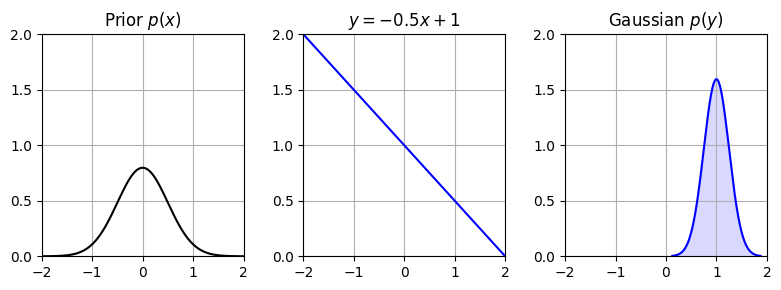

In [ ]:
# Linear mapping
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Prior ---
x = np.linspace(-2, 2, 400)
mu, sigma = 0.0, 0.5
prior_pdf = norm.pdf(x, mu, sigma)

# --- Linear mapping y = -0.5x + 1 ---
a, b = -0.5, 1.0
y_lin = a * x + b
mu_lin = a * mu + b  # mean of the output distribution
sigma_lin = abs(a) * sigma  # scaled standard deviation (|a| since variance scales with a^2)
y_grid = np.linspace(mu_lin - 3.5*sigma_lin, mu_lin + 3.5*sigma_lin, 400)  # evaluation range set to cover ±3.5σ around the new mean
pdf_lin = norm.pdf(y_grid, mu_lin, sigma_lin)   # the resulting probability density function p(y), which remains Gaussian.

# --- Plot ---
fig, axs = plt.subplots(1, 3, figsize=(8, 3))
axs[0].plot(x, prior_pdf, 'k-')
axs[0].set_title('Prior $p(x)$')
axs[1].plot(x, y_lin, 'b-')
axs[1].set_title('$y = -0.5x + 1$')
axs[2].plot(y_grid, pdf_lin, 'b-')
axs[2].fill_between(y_grid, 0, pdf_lin, color='b', alpha=0.15)

axs[0].set_xlim(-2, 2); axs[0].set_ylim(0, 2.0)
axs[1].set_xlim(-2, 2); axs[1].set_ylim(0, 2.0)
axs[2].set_xlim(-2, 2); axs[2].set_ylim(0, 2.0)
axs[2].set_title('Gaussian $p(y)$')
for ax in axs: ax.grid(True)
plt.tight_layout(); plt.show()

<span style="color:#a4d4a3">**2. Gaussian distribution through a Non-linear Map**</span>

In contrast to the linear case, we now apply a <span style="color:#ffa500">**non-linear transformation**</span> to the same Gaussian prior:

$$
y = \sin(x) + 0.1 \cdot \sin(5x)
$$

This function introduces local curvature and high-frequency variation, which distorts the Gaussian shape of the distribution. The output distribution $ p(y) $ is no longer Gaussian.

We use <span style="color:#ffa500">**Monte Carlo sampling**</span> to estimate how the distribution transforms.

<details>
<summary><strong>📝 <span style="color:#e74c3c">Note:</span></strong> <em> Monte Carlo Push-Forward </em> </summary>
<br>

Since the non-linear function $ f(x) = \sin(x) + 0.1\sin(5x) $ is too complex for analytical treatment, we rely on a <span style="color:#ffa500">**Monte Carlo method**</span> to approximate the resulting distribution $ p(y) $.

That is, we:

1. <span style="color:#00703c">**Sample**</span> many values $ x \sim \mathcal{N}(\mu, \sigma) $.
2. <span style="color:#00703c">**Transform**</span> each sample using $ y = f(x) $.
3. <span style="color:#00703c">**Aggregate**</span> the transformed values into a histogram.

This gives a data-driven approximation of the true push-forward distribution, which captures all non-linear distortions introduced by $ f(x) $.

</details>


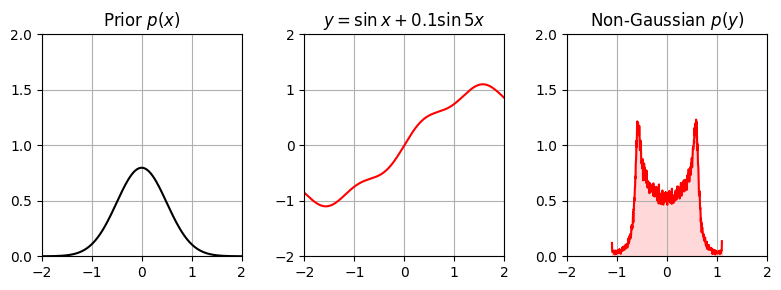

In [ ]:
# Non-linear mapping
def f_nl(x): return np.sin(x) + 0.1*np.sin(5*x)

# Monte-Carlo push-forward
N = 100_000
ys  = f_nl(np.random.normal(mu, sigma, N))  # apply f_nl to random samples from the Gaussian prior p(x).
y_nl = np.linspace(ys.min(), ys.max(), 500)
pdf_nl, _ = np.histogram(ys, bins=500, range=(ys.min(), ys.max()), density=True)  # estimate the resulting distribution p(y) using a histogram

# --- Plot ---
fig, axs = plt.subplots(1, 3, figsize=(8, 3))  # Adjusted figure size
axs[0].plot(x, prior_pdf, 'k-')
axs[0].set_title('Prior $p(x)$')
axs[1].plot(x, f_nl(x), 'r-')
axs[1].set_title('$y = \\sin x + 0.1\\sin 5x$')
axs[2].plot(y_nl, pdf_nl, 'r-')
axs[2].fill_between(y_nl, 0, pdf_nl, color='r', alpha=0.15)
axs[2].set_title('Non-Gaussian $p(y)$')

axs[0].set_xlim(-2, 2); axs[0].set_ylim(0, 2)
axs[1].set_xlim(-2, 2); axs[1].set_ylim(-2, 2)
axs[2].set_xlim(-2, 2); axs[2].set_ylim(0, 2)

for ax in axs: ax.grid(True)
plt.tight_layout(); plt.show()


<span style="color:#a4d4a3">**3. Local Linearization**</span>

To address the distortion introduced by the non-linear map, the <span style="color:#ffa500">**Extended Kalman Filter (EKF)**</span> performs a <span style="color:#ffa500">**local linear approximation**</span> of the function around a point $ x_0 $. This allows it to maintain a Gaussian belief while capturing local non-linear behavior.

We linearize the function  
$$
f(x) = \sin(x) + 0.1\sin(5x)
$$  
around $ x_0 = 0.4 $ using a first-order Taylor expansion:

$$
f(x) \approx f(x_0) + f'(x_0)(x - x_0)
$$

The EKF then pushes the Gaussian prior through this linear approximation. This results in an approximate Gaussian distribution $ p(y) $, centered at $ f(x_0) $, with variance scaled by the local slope $ f'(x_0) $.


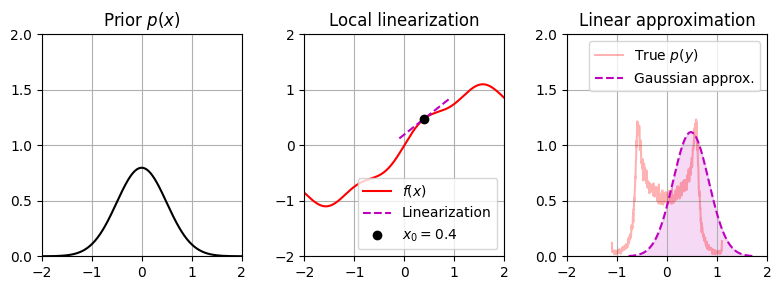

In [ ]:
# Local linearization
x0 = 0.4    # point of linearization, move around to see different effects
G0 = np.cos(x0) + 0.1*5*np.cos(5*x0)          # local slope: derivative f'(x0)
y0 = f_nl(x0)    # output of the function at x0

# Local linear function around x0
dx = 0.5
x_local = np.linspace(x0-dx, x0+dx, 100)
y_local = y0 + G0*(x_local - x0)    # linearized version of the function in a local window

# Push-forward Gaussian
sigma_ekf = abs(G0)*sigma
y_ekf = np.linspace(y0 - 3.5*sigma_ekf, y0 + 3.5*sigma_ekf, 400)
pdf_ekf = norm.pdf(y_ekf, y0, sigma_ekf)    # Gaussian approximation of the push-forward using first-order Taylor expansion

# --- Plot ---
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

# Prior
axs[0].plot(x, prior_pdf, 'k-')
axs[0].set_title('Prior $p(x)$')

# Mapping + linearization
axs[1].plot(x, f_nl(x), 'r-', label='$f(x)$')
axs[1].plot(x_local, y_local, 'm--', label='Linearization')
axs[1].plot(x0, y0, 'ko', label='$x_0=0.4$')
axs[1].set_title('Local linearization')
axs[1].legend()

# Push-forward comparison
axs[2].plot(y_nl, pdf_nl, 'r-', alpha=0.3, label='True $p(y)$')
axs[2].plot(y_ekf, pdf_ekf, 'm--', label='Gaussian approx.')
axs[2].fill_between(y_ekf, 0, pdf_ekf, color='m', alpha=0.15)
axs[2].set_title('Linear approximation')
axs[2].legend()

axs[0].set_xlim(-2, 2); axs[0].set_ylim(0, 2.0)
axs[1].set_xlim(-2, 2); axs[1].set_ylim(-2, 2)
axs[2].set_xlim(-2, 2); axs[2].set_ylim(0, 2.0)

for ax in axs: ax.grid(True)
plt.tight_layout(); plt.show()


#### ✔️ <span style="color:#a4d4a3">Conclusion: Why Local Linearization Matters</span>

This example illustrates the <span style="color:#ffa500">**limitations of the standard Kalman Filter**</span> and the <span style="color:#ffa500">**motivation behind the Extended Kalman Filter (EKF)**</span>.

- A <span style="color:#ffa500">**linear transformation**</span> of a Gaussian distribution results in another Gaussian — this is the core strength of the standard Kalman Filter.
- However, real-world (especially robotic) systems often involve <span style="color:#ffa500">**non-linear models**</span>, where the output distribution becomes <span style="color:#ffa500">**non-Gaussian**</span>, potentially multi-modal or skewed.
- The EKF provides a compromise: it <span style="color:#ffa500">**locally linearizes**</span> the non-linear model around the current mean. This allows the filter to maintain a <span style="color:#ffa500">**Gaussian belief**</span> while still capturing <span style="color:#ffa500">**local curvature**</span> in the dynamics or observations.

> ⚠️ <span style="color:#0098ff">**Note:**</span> <em> EKF does <span style="color:#e74c3c">**not**</span> produce exact results for non-linear systems. But in many practical scenarios where the system is <span style="color:#e74c3c">**"locally close to linear"**</span>, it provides a good approximation while remaining computationally efficient.</em>

This lays the foundation for applying EKF to <span style="color:#ffa500">**non-linear motion models**</span> and <span style="color:#ffa500">**sensor models**</span> in SLAM, which we will explore next.

---

### 📚 <span style="color:#a4d4a3">**Reading Material**</span>

**Kalman Filter and EKF**
- Thrun et al.: *"Probabilistic Robotics"*, **Chapter 3**